In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# defined as phi(f, R, Delta) in Stommel's original paper
def f_flux_1(x, R, Lambda, Delta):
    tmp_1 = (-1) / (1 + abs(x))
    tmp_2 = R / (1 + (abs(x) / Delta))
    tmp_3 = (-1) * x
    return tmp_1 + tmp_2

# defined as Lambda * f in Stommel's original paper
def f_flux_2(x, R, Lambda, Delta):
    return Lambda * x

# for each point, check if stable or not
def check_stability_fixed_point_stommel_model(f, x, y, R, Delta, Lambda):
    if f > 0:
        Tr = (-1 - Delta) - (3 / Lambda) * (- y + R * x)
        det = Delta + (1 / Lambda) * ((- y * (1 + 2 * Delta)) + (R * x * (2 + Delta)) + ((2 / Lambda) * (-y + R * x)**2))
    else:
        Tr = (-1 - Delta) + (3 / Lambda) * (- y + R * x)
        det = Delta + (1 / Lambda) * ((y * (1 + 2 * Delta)) - (R * x * (2 + Delta)) + ((2 / Lambda) * (-y + R * x)**2))
    
    if det < 0:
        return Tr, det, "saddle node"
    if det == 0 or (det > 0 and Tr == 0):
        return Tr, det, "NA"
    # now det > 0
    if Tr > 0:
        # unstable
        if (Tr**2)/4 > det:
            return Tr, det, "unstable node"
        else:
            return Tr, det, "unstable spiral"
    else: # Tr < 0
        # stable
        if (Tr**2)/4 > det:
            return Tr, det, "stable node"
        else:
            return Tr, det, "stable spiral"
    
def stability_analysis(R, Lambda, Delta, min_f, max_f, range_float, output_file_plot):
    # grafically get the flux at equilibria points
    f = np.array([f_val / range_float for f_val in range(int(min_f*range_float), int((max_f)*range_float + 1))])
    
    # calculate the curves
    y_1 = np.array([f_flux_1(f_val, R, Lambda, Delta) for f_val in f])
    y_2 = np.array([f_flux_2(f_val, R, Lambda, Delta) for f_val in f])
    
    # now find f value(on the x-axis) at the intersections
    idx_f = np.argwhere(np.diff(np.sign(y_1 - y_2))).flatten()
    f_eq = [f[idx_val] for idx_val in idx_f]
    y_f_eq = [y_1[idx_val] for idx_val in idx_f]
    
    # display
    plt.figure(dpi = 150)
    plt.axvline(x=0, c = 'k', linewidth = 1)
    plt.axhline(y=0, c = 'k', linewidth = 1)
    plt.plot(f, y_1, c = 'b', linewidth = 1.2)
    plt.plot(f, y_2, c = 'g', linewidth = 1.2)
    plt.plot(f[idx_f], y_1[idx_f], 'ro', markersize = 4)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-1, 1.5)
    plt.xlabel("Flux", fontsize = 8, labelpad = 0)
    plt.grid()
    for i in range(len(f_eq)):
        plt.text(f_eq[i] + 0.05 , y_f_eq[i] - 0.07, "f = %0.2f"%(f_eq[i]), fontsize = 6)
    plt.tight_layout()
    plt.savefig(output_file_plot)
    plt.show()
    
    # find x and y values correcponding to different values of flux at quilibrium
    x_eq = []
    y_eq = []
    for f_val in f_eq:
        x_eq.append(1/(1 + (abs(f_val)/Delta)))
        y_eq.append(1/(1 + abs(f_val)))
    
    # check stability and display results
    for i in range(len(f_eq)):
        print("Fixed point %i:\nflux = %0.5f, x = %0.5f, y = %0.5f"%(i+1, f_eq[i], x_eq[i], y_eq[i]))
        Tr, det, fixed_point_type = check_stability_fixed_point_stommel_model(f_eq[i], x_eq[i], y_eq[i], R, Delta, Lambda)
        print("Trace = %0.2f, Determinant = %0.2f"%(Tr, det))
        print("Type: %s\n"%(fixed_point_type))
       

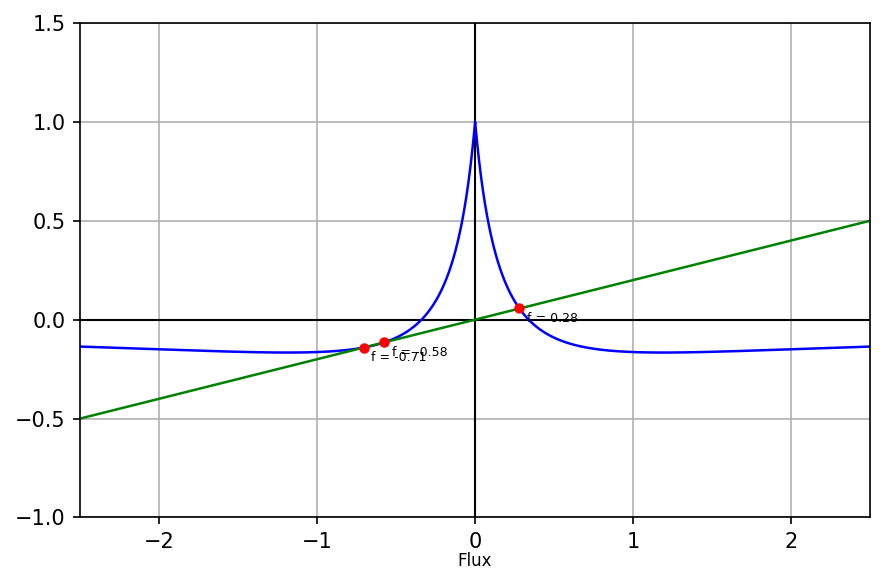

Fixed point 1:
flux = -0.70600, x = 0.22248, y = 0.58617
Trace = -3.32, Determinant = 0.41
Type: stable node

Fixed point 2:
flux = -0.57700, x = 0.25933, y = 0.63412
Trace = -2.93, Determinant = -0.39
Type: saddle node

Fixed point 3:
flux = 0.28000, x = 0.41911, y = 0.78125
Trace = -2.06, Determinant = 4.11
Type: stable spiral



In [32]:
# parameters related to the model
R = 2
Lambda = 1/5
Delta = 1/4.95 # 1/6

# parameters to display graph
min_f = -2.5
max_f = 2.5
range_float = 1000.0
output_file_plot = "3_equilibriums.png"

stability_analysis(R, Lambda, Delta, min_f, max_f, range_float, output_file_plot)

In [ ]:
a = []
b = []
c = []

# parameters related to the model
R = 2
Lambda = 1/5
Delta = 1/4.95 # 1/6

# parameters to display graph
min_f = -2.5
max_f = 2.5
range_float = 1000.0
output_file_plot = "tmp.png"

stability_analysis(R, Lambda, Delta, min_f, max_f, range_float, output_file_plot)

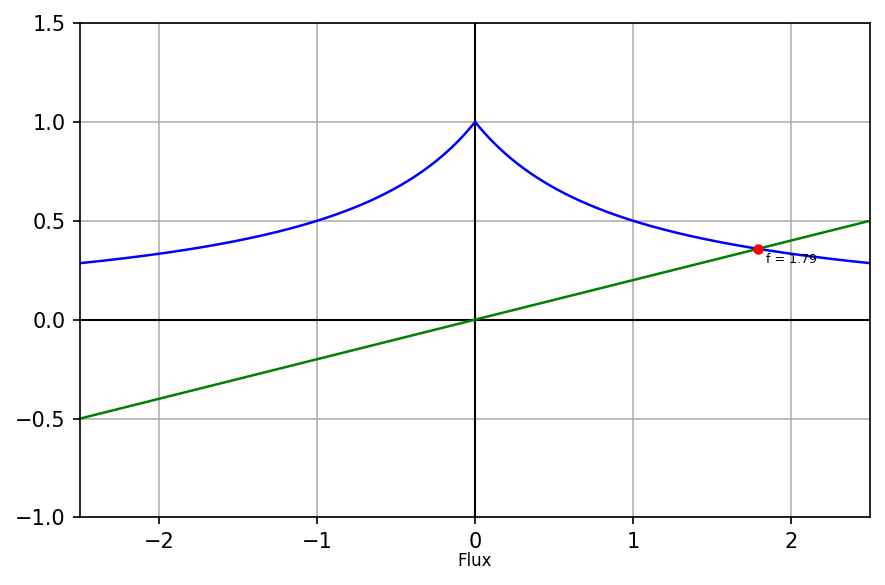

Fixed point 1:
flux = 1.79, x = 0.36, y = 0.36
Trace = -7.37, Determinant = 12.79
Type: stable node



In [25]:
# parameters related to the model
R = 2
Lambda = 1/5
Delta = 1

# parameters to display graph
min_f = -2.5
max_f = 2.5
range_float = 1000.0
output_file_plot = "1_equilibrium.png"

stability_analysis(R, Lambda, Delta, min_f, max_f, range_float, output_file_plot)

In [ ]:







# draft

flux values at equilibrium: [-1.068, -0.308, 0.219]


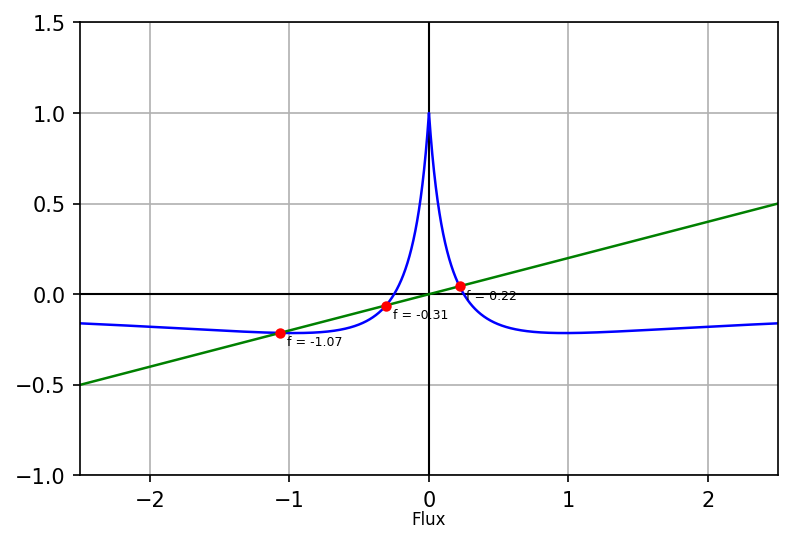

In [10]:

f = np.array([f_val / range_float for f_val in range(int(min_f*range_float), int((max_f)*range_float + 1))])
# print(f)

def f_flux_1(x, R, Lambda, Delta):
    tmp_1 = (-1) / (1 + abs(x))
    tmp_2 = R / (1 + (abs(x) / Delta))
    tmp_3 = (-1) * x
    return tmp_1 + tmp_2

def f_flux_2(x, R, Lambda, Delta):
    return Lambda * x

y_1 = np.array([f_flux_1(f_val, R, Lambda, Delta) for f_val in f])
y_2 = np.array([f_flux_2(f_val, R, Lambda, Delta) for f_val in f])
idx_f = np.argwhere(np.diff(np.sign(y_1 - y_2))).flatten()
# now find x value (flux) and y value for the intersection
f_eq = [f[idx_val] for idx_val in idx_f]
y_f_eq = [y_1[idx_val] for idx_val in idx_f]
print("flux values at equilibrium:", f_eq)
# print(y_f_eq)

# display
plt.figure(dpi = 150)
plt.axvline(x=0, c = 'k', linewidth = 1)
plt.axhline(y=0, c = 'k', linewidth = 1)
plt.plot(f, y_1, c = 'b', linewidth = 1.2)
plt.plot(f, y_2, c = 'g', linewidth = 1.2)
plt.plot(f[idx_f], y_1[idx_f], 'ro', markersize = 4)
plt.xlim(-2.5, 2.5)
plt.ylim(-1, 1.5)
plt.xlabel("Flux", fontsize = 8, labelpad = 0)
plt.grid()
for i in range(len(f_eq)):
    plt.text(f_eq[i] + 0.05 , y_f_eq[i] - 0.07, "f = %0.2f"%(f_eq[i]), fontsize = 6)
plt.show()

In [5]:
x_eq = []
y_eq = []

for f_val in f_eq:
    x_eq.append(1/(1 + (abs(f_val)/Delta)))
    y_eq.append(1/(1 + abs(f_val)))
    
print(x_eq)
print(y_eq)

[0.13498920086393087, 0.351123595505618, 0.43215211754537597]
[0.48355899419729204, 0.764525993883792, 0.8203445447087776]


In [6]:
for i in range(len(f_eq)):
    print("%i: f = %0.2f, x = %0.2f, y = %0.2f"%(i, f_eq[i], x_eq[i], y_eq[i]))

0: f = -1.07, x = 0.13, y = 0.48
1: f = -0.31, x = 0.35, y = 0.76
2: f = 0.22, x = 0.43, y = 0.82


In [11]:
# now for each point, check if stable or not
def check_stability_fixed_point_stommel_model(f, x, y, R, Delta, Lambda):
    if f > 0:
        Tr = (-1 - Delta) - (3 / Lambda) * (- y + R * x)
        det = Delta + (1 / Lambda) * ((- y * (1 + 2 * Delta)) + (R * x * (2 + Delta)) + ((2 / Lambda) * (-y + R * x)**2))
    else:
        Tr = (-1 - Delta) + (3 / Lambda) * (- y + R * x)
        det = Delta + (1 / Lambda) * ((y * (1 + 2 * Delta)) - (R * x * (2 + Delta)) + ((2 / Lambda) * (-y + R * x)**2))
    
    if det < 0:
        return Tr, det, "saddle"
    if det == 0 or (det > 0 and Tr == 0):
        return Tr, det, "NA"
    # now det > 0
    if Tr > 0:
        # unstable
        if (Tr**2)/4 > det:
            return Tr, det, "unstable node"
        else:
            return Tr, det, "unstable spiral"
    else: # Tr < 0
        # stable
        if (Tr**2)/4 > det:
            return Tr, det, "stable node"
        else:
            return Tr, det, "stable spiral"
    

In [12]:
for i in range(len(f_eq)):
    print("%i: f = %0.2f, x = %0.2f, y = %0.2f"%(i, f_eq[i], x_eq[i], y_eq[i]))
    Tr, det, fixed_point_type = check_stability_fixed_point_stommel_model(f_eq[i], x_eq[i], y_eq[i], R, Delta, Lambda)
    print("Trace = %0.2f, Determinant = %0.2f"%(Tr, det))
    print("Type: %s\n"%(fixed_point_type))
    

0: f = -1.07, x = 0.13, y = 0.48
Trace = -4.37, Determinant = 2.75
Type: stable node

1: f = -0.31, x = 0.35, y = 0.76
Trace = -2.10, Determinant = -2.15
Type: saddle

2: f = 0.22, x = 0.43, y = 0.82
Trace = -1.83, Determinant = 4.16
Type: stable spiral



In [ ]:

from sympy.solvers import solve
from sympy import Symbol

In [28]:
a = 2
x = Symbol('x')
sol = solve(x**a - 1, x)
print(sol)

[-1, 1]


In [29]:
x = Symbol('x', real = True)
sol = solve(abs(x) - 2, x)
print(sol)

[-2, 2]


In [31]:
def func(x):
    return abs(x) - 2

x = Symbol('x', real = True)
sol = solve(func(x), x)
print(sol)

[-2, 2]


In [34]:
# parameters
R = float(2)
Delta = float(1/5)
Lambda = float(1/6)

def f_flux(x, R, Lambda, Delta):
    tmp_1 = (-1) / (1 + abs(x))
    tmp_2 = R / (1 + (abs(x) / Delta))
    tmp_3 = (-1) * x
    return tmp_1 + tmp_2 + tmp_3
    
    
    return abs(x) - 2

x = Symbol('x', real = True)
f = solve(f_flux(x, R, Lambda, Delta), x)
print(f)

TypeError: Invalid comparison of non-real -0.694199761856471 - 0.761354385046289*I